In [2]:
# Cell 1: Imports & paths
from pathlib import Path
import pandas as pd

DATA_DIR = Path("data/hm")
ARTICLES_CSV = DATA_DIR / "articles.csv"
TRANS_CSV = DATA_DIR / "transactions_train.csv"
IMAGES_DIR = DATA_DIR / "images"

ARTICLES_CSV.exists(), TRANS_CSV.exists(), IMAGES_DIR.exists()


(True, True, True)

In [4]:
from pathlib import Path

DATA_DIR = Path("data/hm")
ARTICLES_CSV = DATA_DIR / "articles.csv"
TRANS_CSV = DATA_DIR / "transactions_train.csv"
IMAGES_DIR = DATA_DIR / "images"

print("Exists:", ARTICLES_CSV.exists(), TRANS_CSV.exists(), IMAGES_DIR.exists())
if TRANS_CSV.exists():
    print("transactions_train.csv size (GB):", round(TRANS_CSV.stat().st_size / 1e9, 2))


Exists: True True True
transactions_train.csv size (GB): 3.49


In [5]:
import pandas as pd

articles = pd.read_csv("data/hm/articles.csv", low_memory=False)
print("Articles shape:", articles.shape)
articles.head()


Articles shape: (105542, 25)


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [6]:
transactions_sample = pd.read_csv(
    "data/hm/transactions_train.csv",
    nrows=100_000,   # only first 100k rows
    parse_dates=["t_dat"],
    usecols=["t_dat", "article_id", "customer_id", "price", "sales_channel_id"]  # only needed cols
)

print("Transactions sample shape:", transactions_sample.shape)
transactions_sample.head()


Transactions sample shape: (100000, 5)


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [7]:
transactions_sample["t_dat"].min(), transactions_sample["t_dat"].max()


(Timestamp('2018-09-20 00:00:00'), Timestamp('2018-09-22 00:00:00'))

In [9]:
# Cell 3: Keep only useful columns to start
article_cols = [
    "article_id", "product_code", "prod_name", "product_type_name", 
    "product_group_name", "colour_group_name", "perceived_colour_value_name",
    "perceived_colour_master_name", "graphical_appearance_name", "detail_desc"
]
articles_small = articles[article_cols].copy()

# Reduce memory: optional sampling for faster prototyping
# transactions = transactions.sample(1_000_000, random_state=42)

# Merge
df = transactions_sample.merge(articles_small, on="article_id", how="left")
df.head(), df.shape


(       t_dat                                        customer_id  article_id  \
 0 2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
 1 2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   
 2 2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004   
 3 2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003   
 4 2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004   
 
       price  sales_channel_id  product_code                 prod_name  \
 0  0.050831                 2        663713  Atlanta Push Body Harlow   
 1  0.030492                 2        541518   Rae Push (Melbourne) 2p   
 2  0.015237                 2        505221               Inca Jumper   
 3  0.016932                 2        685687      W YODA KNIT OL OFFER   
 4  0.016932                 2        685687      W YODA KNIT OL OFFER   
 
   product_type_name  product_group_name colour_group_name  \
 0    Unde

In [10]:
# Cell 4: Image path helper
from pathlib import Path

def article_image_path(article_id, images_root: Path = IMAGES_DIR) -> Path:
    aid = str(int(article_id)).zfill(10)  # zero-pad to 10 digits
    folder = aid[:3]
    return images_root / folder / f"{aid}.jpg"

# Test:
p = article_image_path(df["article_id"].iloc[0])
p, p.exists()


(WindowsPath('data/hm/images/066/0663713001.jpg'), True)

In [11]:
# Cell 5: TensorFlow image pipeline
import tensorflow as tf

IMG_SIZE = (224, 224)

def load_and_preprocess_image(path: str | Path):
    img = tf.io.read_file(str(path))
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32) / 255.0
    return img


In [12]:
# Cell 6: Text cleaning
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def clean_text(s: str) -> str:
    if not isinstance(s, str):
        return ""
    s = s.lower()
    s = re.sub(r"[^a-z0-9\s]", " ", s)
    tokens = [t for t in s.split() if t not in ENGLISH_STOP_WORDS]
    return " ".join(tokens)

articles_small["text_concat"] = (
    articles_small["prod_name"].fillna("") + " " + articles_small["detail_desc"].fillna("")
).apply(clean_text)

articles_small[["article_id", "text_concat"]].head()


,article_id,text_concat
0,108775015,strap jersey narrow shoulder straps
1,108775044,strap jersey narrow shoulder straps
2,108775051,strap 1 jersey narrow shoulder straps
3,110065001,op t shirt idro microfibre t shirt bra underwi...
4,110065002,op t shirt idro microfibre t shirt bra underwi...


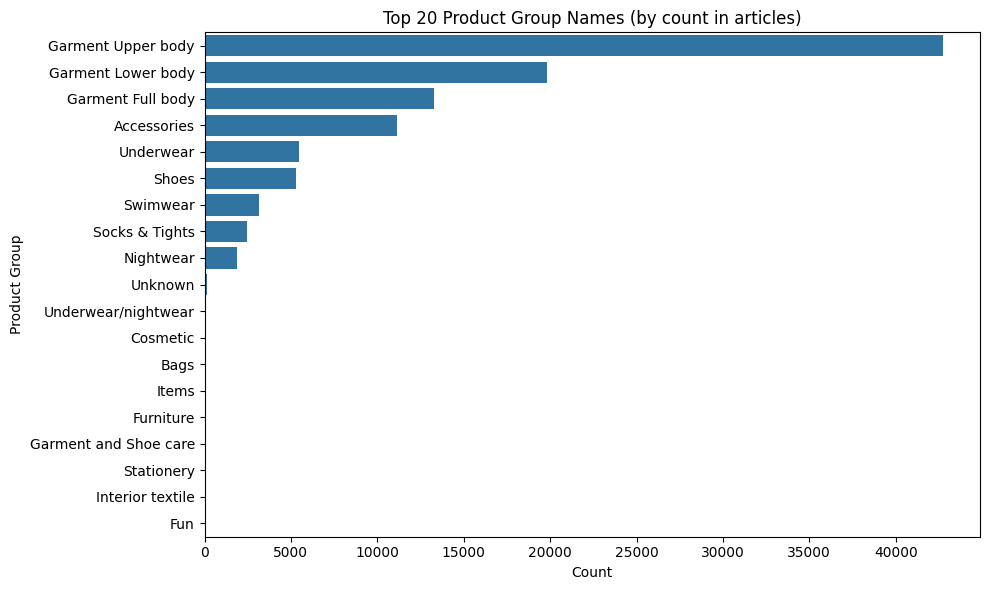

In [13]:
# Cell 7: Bar chart of top product_group_name
import matplotlib.pyplot as plt
import seaborn as sns

top20 = (articles_small["product_group_name"]
         .value_counts()
         .head(20))

plt.figure(figsize=(10,6))
sns.barplot(x=top20.values, y=top20.index)
plt.title("Top 20 Product Group Names (by count in articles)")
plt.xlabel("Count")
plt.ylabel("Product Group")
plt.tight_layout()
plt.show()


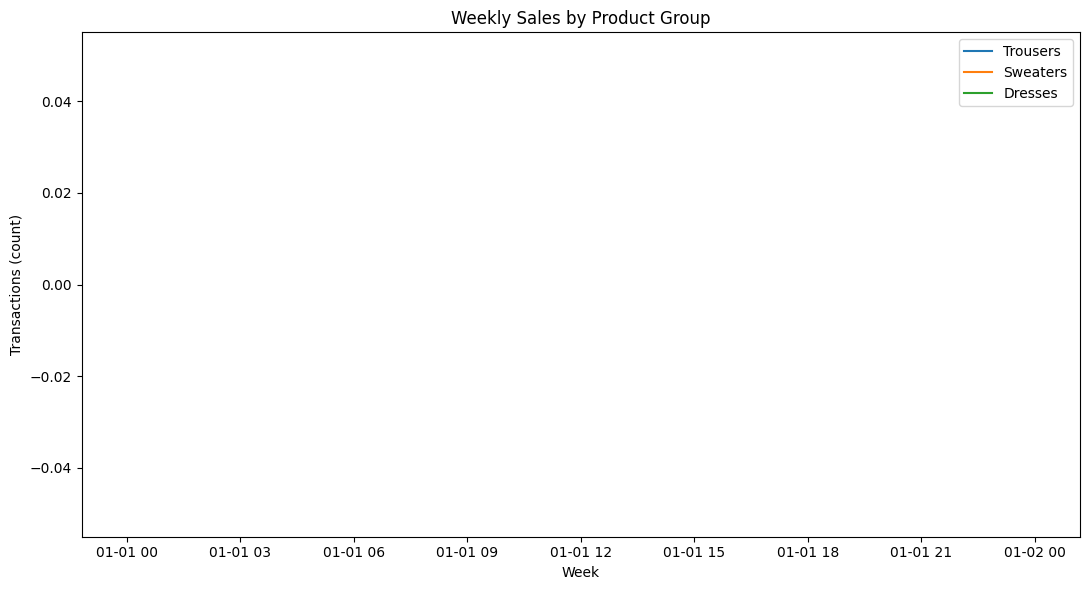

In [14]:
# Cell 8: Weekly sales for chosen categories
sel_groups = ["Trousers", "Sweaters", "Dresses"]  # adjust as you like

weekly = (df[df["product_group_name"].isin(sel_groups)]
          .assign(week=lambda d: d["t_dat"].dt.to_period("W").dt.start_time)
          .groupby(["week", "product_group_name"])
          .size()
          .reset_index(name="sales"))

plt.figure(figsize=(11,6))
for g in sel_groups:
    sub = weekly[weekly["product_group_name"] == g]
    plt.plot(sub["week"], sub["sales"], label=g)
plt.title("Weekly Sales by Product Group")
plt.xlabel("Week")
plt.ylabel("Transactions (count)")
plt.legend()
plt.tight_layout()
plt.show()


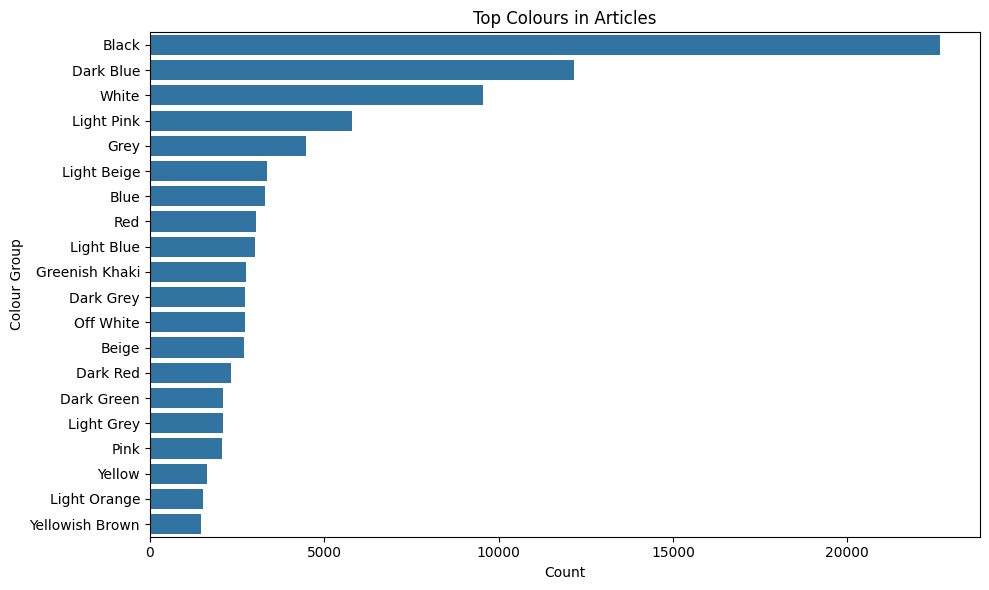

In [15]:
# Cell 9: Colour distribution
color_counts = (articles_small["colour_group_name"]
                .fillna("Unknown")
                .value_counts()
                .head(20))

plt.figure(figsize=(10,6))
sns.barplot(x=color_counts.values, y=color_counts.index)
plt.title("Top Colours in Articles")
plt.xlabel("Count")
plt.ylabel("Colour Group")
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
from pathlib import Path

# Paths
DATA_DIR = Path("data/hm")
ARTICLES_CSV = DATA_DIR / "articles.csv"
IMAGES_DIR = DATA_DIR / "images"

# Load articles if missing
if 'articles' not in globals():
    articles = pd.read_csv(ARTICLES_CSV, low_memory=False)

# Ensure the slim articles view exists
article_cols = [
    "article_id","product_group_name","product_code","prod_name",
    "product_type_name","colour_group_name","perceived_colour_value_name",
    "perceived_colour_master_name","graphical_appearance_name","detail_desc"
]
if 'articles_small' not in globals():
    articles_small = articles[article_cols].copy()

# Image path helper
def article_image_path(article_id: int) -> Path:
    s = str(int(article_id)).zfill(10)      # e.g., 108775015 -> "0108775015"
    return IMAGES_DIR / s[:3] / f"{s}.jpg"  # data/hm/images/010/0108775015.jpg

# Build (article_id, product_group_name, image_path) and keep existing files
aid_img = articles_small[["article_id","product_group_name"]].copy()
aid_img["image_path"] = aid_img["article_id"].apply(article_image_path)
aid_img = aid_img[aid_img["image_path"].apply(lambda p: Path(p).exists())].reset_index(drop=True)

# Sample for speed while testing
aid_img_small = aid_img.sample(3000, random_state=42) if len(aid_img) > 3000 else aid_img

print("aid_img rows:", len(aid_img), "| aid_img_small rows:", len(aid_img_small))
aid_img_small.head()


aid_img rows: 105100 | aid_img_small rows: 3000


,article_id,product_group_name,image_path
13464,559129003,Garment Lower body,data\hm\images\055\0559129003.jpg
5748,500262002,Garment Upper body,data\hm\images\050\0500262002.jpg
91022,849586004,Garment Full body,data\hm\images\084\0849586004.jpg
72611,770180002,Socks & Tights,data\hm\images\077\0770180002.jpg
96854,873552005,Garment Upper body,data\hm\images\087\0873552005.jpg


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Define only if missing
if 'base' not in globals():
    tf.keras.backend.clear_session()
    tf.keras.backend.set_image_data_format("channels_last")
    base = tf.keras.applications.MobileNetV2(
        include_top=False, weights="imagenet", input_shape=(224,224,3), pooling="avg"
    )

if 'load_and_preprocess_image' not in globals():
    IMG_SIZE = (224, 224)
    def load_and_preprocess_image(path):
        img = tf.io.read_file(tf.strings.as_string(path))
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, IMG_SIZE)
        img = tf.cast(img, tf.float32)   # 0..255
        img = preprocess_input(img)      # → [-1,1] for MobileNetV2
        return img


In [1]:
import tensorflow as tf

# (A) If your GPU is small/unstable, FORCE CPU. Do this BEFORE building the model:
# tf.config.set_visible_devices([], 'GPU')

# (B) Or allow gradual GPU growth (safer than grabbing all VRAM):
try:
    for g in tf.config.experimental.list_physical_devices('GPU'):
        tf.config.experimental.set_memory_growth(g, True)
except Exception as e:
    print("GPU mem growth not set:", e)

# Reduce thread pressure (helps on some Windows setups)
tf.config.threading.set_intra_op_parallelism_threads(2)
tf.config.threading.set_inter_op_parallelism_threads(2)


In [6]:
import numpy as np, pandas as pd, tensorflow as tf

labels_cat = pd.Categorical(aid_img_small["product_group_name"])
class_names = list(labels_cat.categories)
y_idx = labels_cat.codes.astype(np.int32)
paths = aid_img_small["image_path"].astype(str).tolist()

BATCH = 16   # smaller than 64 to reduce RAM/VRAM spikes

def _load_fn(path, y):
    return load_and_preprocess_image(path), y

ds = (tf.data.Dataset.from_tensor_slices((paths, y_idx))
        .map(_load_fn, num_parallel_calls=2)  # lower parallelism
        .batch(BATCH)
        .prefetch(1))                         # tiny prefetch to save RAM

int(len(paths)), len(class_names)


(3000, 13)

In [7]:
from pathlib import Path
ART = Path("artifacts"); ART.mkdir(exist_ok=True)

N = len(paths)
D = base.output_shape[-1]     # 1280 for MobileNetV2

# Create memory-mapped array on disk
X_mm = np.memmap(ART / "X_img_mm.dat", dtype="float32", mode="w+", shape=(N, D))
y_arr = np.empty(N, dtype=np.int32)

i = 0
for step, (imgs, yy) in enumerate(ds):
    feats = base(imgs, training=False).numpy().astype("float32")  # (b, D)
    b = feats.shape[0]
    X_mm[i:i+b] = feats
    y_arr[i:i+b] = yy.numpy()
    i += b
    if (step + 1) % 10 == 0:
        print(f"Written {i}/{N} feature rows...")

# Flush to disk
X_mm.flush()
np.save(ART / "y.npy", y_arr)
aid_img_small.to_csv(ART / "meta.csv", index=False)

print("✅ Features streamed to disk:",
      "\n  artifacts/X_img_mm.dat (memmap)",
      "\n  artifacts/y.npy",
      "\n  artifacts/meta.csv")


Written 160/3000 feature rows...
Written 320/3000 feature rows...
Written 480/3000 feature rows...
Written 640/3000 feature rows...
Written 800/3000 feature rows...
Written 960/3000 feature rows...
Written 1120/3000 feature rows...
Written 1280/3000 feature rows...
Written 1440/3000 feature rows...
Written 1600/3000 feature rows...
Written 1760/3000 feature rows...
Written 1920/3000 feature rows...
Written 2080/3000 feature rows...
Written 2240/3000 feature rows...
Written 2400/3000 feature rows...
Written 2560/3000 feature rows...
Written 2720/3000 feature rows...
Written 2880/3000 feature rows...
✅ Features streamed to disk: 
  artifacts/X_img_mm.dat (memmap) 
  artifacts/y.npy 
  artifacts/meta.csv


In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 1) Count samples per class
counts = np.bincount(y, minlength=len(class_names))
valid_classes = np.where(counts >= 2)[0]

# 2) Filter X/y to those classes
mask = np.isin(y, valid_classes)
Xf = X_img[mask]
yf = y[mask]

# 3) Remap old label ids -> [0..K-1] and shrink class_names accordingly
remap = {old:i for i, old in enumerate(valid_classes)}
yf_remap = np.vectorize(remap.get)(yf)
class_names_f = [class_names[i] for i in valid_classes]

# 4) Stratified split & train
X_tr, X_va, y_tr, y_va = train_test_split(
    Xf, yf_remap, test_size=0.2, stratify=yf_remap, random_state=42
)

clf = LogisticRegression(max_iter=1000, multi_class="auto", n_jobs=-1)
clf.fit(X_tr, y_tr)
pred = clf.predict(X_va)
print(classification_report(y_va, pred, target_names=class_names_f, zero_division=0))


d:\fashion_trends_project\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


                    precision    recall  f1-score   support

       Accessories       0.82      0.85      0.83        59
 Garment Full body       0.62      0.69      0.65        72
Garment Lower body       0.88      0.91      0.90       116
Garment Upper body       0.88      0.88      0.88       246
         Nightwear       1.00      0.45      0.62        11
             Shoes       0.94      0.94      0.94        31
    Socks & Tights       0.86      0.80      0.83        15
          Swimwear       0.43      0.35      0.39        17
         Underwear       0.86      0.78      0.82        32
           Unknown       0.00      0.00      0.00         1

          accuracy                           0.83       600
         macro avg       0.73      0.67      0.69       600
      weighted avg       0.83      0.83      0.83       600



In [10]:
from pathlib import Path
import joblib, json, numpy as np

ART = Path("artifacts"); ART.mkdir(exist_ok=True)

# Save model
joblib.dump(clf, ART / "logreg_img.pkl")

# Save the class names that match clf's label indices
with open(ART / "classes.json", "w") as f:
    json.dump({"classes": class_names_f}, f, indent=2)

# (Optional) Save the filtered features/labels you trained on
# np.save(ART / "X_img_f.npy", Xf)
# np.save(ART / "y_f.npy", yf_remap)

print("Saved: artifacts/logreg_img.pkl, artifacts/classes.json")


Saved: artifacts/logreg_img.pkl, artifacts/classes.json


In [11]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# assumes `base` (MobileNetV2) and `load_and_preprocess_image` already exist
def predict_image_class(img_path: str):
    x = load_and_preprocess_image(img_path)           # (224,224,3) -> [-1,1]
    x = tf.expand_dims(x, 0)                          # (1,224,224,3)
    feat = base(x, training=False).numpy()            # (1,1280)
    label_id = int(clf.predict(feat)[0])              # uses your saved clf
    return class_names_f[label_id]

# Example:
# predict_image_class("data/hm/images/010/0108775015.jpg")


In [13]:
import pandas as pd
from pathlib import Path

DATA_DIR = Path("data/hm")
TRANS_CSV = DATA_DIR / "transactions_train.csv"

usecols = ["t_dat", "article_id", "price", "sales_channel_id"]
dtypes  = {"article_id":"int32", "price":"float32", "sales_channel_id":"int8"}

transactions_sample = pd.read_csv(
    TRANS_CSV,
    nrows=500_000,                 # adjust if you want more/less
    usecols=usecols,
    dtype=dtypes,
    parse_dates=["t_dat"]
)

print(transactions_sample.shape, transactions_sample["t_dat"].min(), transactions_sample["t_dat"].max())


(500000, 4) 2018-09-20 00:00:00 2018-09-29 00:00:00


In [14]:
if 'articles_small' not in globals():
    articles = pd.read_csv(DATA_DIR / "articles.csv", low_memory=False)
    article_cols = [
        "article_id","product_group_name","product_code","prod_name",
        "product_type_name","colour_group_name","perceived_colour_value_name",
        "perceived_colour_master_name","graphical_appearance_name","detail_desc"
    ]
    articles_small = articles[article_cols].copy()



In [15]:
tx = transactions_sample.merge(
    articles_small[["article_id","product_group_name"]],
    on="article_id", how="left"
).dropna(subset=["product_group_name"])

tx["week"] = tx["t_dat"].dt.to_period("W").apply(lambda p: p.start_time)

weekly_pg = (tx.groupby(["week","product_group_name"])
               .size().rename("sales_count").reset_index())

top5 = (weekly_pg.groupby("product_group_name")["sales_count"]
                  .sum().sort_values(ascending=False).head(5).index.tolist())

trend_pg = (weekly_pg[weekly_pg["product_group_name"].isin(top5)]
            .pivot(index="week", columns="product_group_name", values="sales_count")
            .fillna(0))

trend_pg.tail()
# Optional quick plot:
# ax = trend_pg.plot(figsize=(10,4)); ax.set_title("Weekly product-group trend (sample)"); ax.set_ylabel("Sales count");


product_group_name,Accessories,Garment Full body,Garment Lower body,Garment Upper body,Underwear
week,,,,,
2018-09-17,7385,11291,42025,80031,10642
2018-09-24,18660,20140,75541,168489,21276


In [16]:
for col in ["colour_group_name", "graphical_appearance_name"]:
    tx2 = transactions_sample.merge(articles_small[["article_id", col]], on="article_id", how="left").dropna(subset=[col])
    tx2["week"] = tx2["t_dat"].dt.to_period("W").apply(lambda p: p.start_time)
    weekly_attr = tx2.groupby(["week", col]).size().rename("sales_count").reset_index()
    topN = (weekly_attr.groupby(col)["sales_count"].sum().sort_values(ascending=False).head(5).index.tolist())
    pivot = (weekly_attr[weekly_attr[col].isin(topN)]
             .pivot(index="week", columns=col, values="sales_count").fillna(0))
    display(pivot.tail())
    # pivot.plot(figsize=(10,4), title=f"Weekly trend: {col}")


colour_group_name,Black,Dark Blue,Dark Red,Grey,White
week,,,,,
2018-09-17,57470,16325,6293,6904,13473
2018-09-24,118684,32253,12873,15876,26577


graphical_appearance_name,All over pattern,Denim,Melange,Solid,Stripe
week,,,,,
2018-09-17,13505,13037,17994,85907,8714
2018-09-24,26410,20089,37222,176983,15906


In [17]:
import pandas as pd
from pathlib import Path

DATA_DIR = Path("data/hm")
TRANS_CSV = DATA_DIR / "transactions_train.csv"

usecols = ["t_dat","article_id","price","sales_channel_id"]
dtypes  = {"article_id":"int32","price":"float32","sales_channel_id":"int8"}

agg_pg, agg_color, agg_graph = [], [], []

for i, chunk in enumerate(pd.read_csv(
    TRANS_CSV, usecols=usecols, dtype=dtypes, parse_dates=["t_dat"],
    chunksize=1_000_000, low_memory=False
)):
    c = chunk.merge(
        articles_small[["article_id","product_group_name","colour_group_name","graphical_appearance_name"]],
        on="article_id", how="left"
    ).dropna(subset=["product_group_name"])

    c["week"] = c["t_dat"].dt.to_period("W").apply(lambda p: p.start_time)

    g_pg    = c.groupby(["week","product_group_name"]).size().rename("sales_count").reset_index()
    g_color = c.groupby(["week","colour_group_name"]).size().rename("sales_count").reset_index()
    g_graph = c.groupby(["week","graphical_appearance_name"]).size().rename("sales_count").reset_index()

    agg_pg.append(g_pg); agg_color.append(g_color); agg_graph.append(g_graph)

    if (i+1) % 5 == 0:
        print(f"Processed ~{(i+1)*1_000_000:,} rows")

weekly_pg_full    = pd.concat(agg_pg).groupby(["week","product_group_name"])["sales_count"].sum().reset_index()
weekly_color_full = pd.concat(agg_color).groupby(["week","colour_group_name"])["sales_count"].sum().reset_index()
weekly_graph_full = pd.concat(agg_graph).groupby(["week","graphical_appearance_name"])["sales_count"].sum().reset_index()

# Save for reuse
ART = Path("artifacts"); ART.mkdir(exist_ok=True)
weekly_pg_full.to_csv(ART/"weekly_product_group.csv", index=False)
weekly_color_full.to_csv(ART/"weekly_colour_group.csv", index=False)
weekly_graph_full.to_csv(ART/"weekly_graphical_appearance.csv", index=False)

print("Saved weekly trend CSVs in artifacts/")


Processed ~5,000,000 rows
Processed ~10,000,000 rows
Processed ~15,000,000 rows
Processed ~20,000,000 rows
Processed ~25,000,000 rows
Processed ~30,000,000 rows
Saved weekly trend CSVs in artifacts/


In [18]:
top5 = (weekly_pg_full.groupby("product_group_name")["sales_count"]
                    .sum().sort_values(ascending=False).head(5).index)
pivot_pg = weekly_pg_full[weekly_pg_full["product_group_name"].isin(top5)] \
    .pivot(index="week", columns="product_group_name", values="sales_count").fillna(0)
pivot_pg.tail()
# pivot_pg.plot(figsize=(10,4))


product_group_name,Garment Full body,Garment Lower body,Garment Upper body,Swimwear,Underwear
week,,,,,
2020-08-24,23341,66671,131810,7750,23157
2020-08-31,18862,64243,127296,5460,18943
2020-09-07,21575,63481,133254,3928,19893
2020-09-14,19737,51837,109899,3475,17546
2020-09-21,5245,15471,30960,782,4949
